In [1]:
pwd

'/data2/mito_lineage/notebooks/jan21_2021'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

import os
#os.chdir(ROOT_DIR)


from os.path import join, exists
import pandas as pd
import glob
import numpy as np
from src.external.pyvenn import venn
import seaborn as sns
import matplotlib.pyplot as plt
import copy

## Project specific
from src.protocols import clones
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from mplh import cluster_help as ch
from mplh.fig_utils import helper_save as hs
import src.utils.variant_utils as vu

Project Directory: /data2/mito_lineage
fig_utils from mplh
here


In [3]:
config_f = join(ROOT_DIR, "parameters", "jan21_2021/protocols/mtexp_a.yaml")
clones_c = clones.MTExp(config_f=config_f)
clones_c.initialize()

config
{'Project_Directory': '/data2/mito_lineage', 'Working_Directory': '', 'Protocol_Name': 'MTExp', 'Prefix': 'jan21_2021', 'workflow_file': None, 'samples_meta': None, 'samples': 'P2,J2', 'input': {'files': {'sample_csv': {'file': 'parameters/mtscATAC/jan21_2021/jan21_2021.csv', 'is_project': True, 'dir': None}}, 'parameters_f': None, 'protocols': {'mttrace': {'is_project': True, 'files': {'cov_dir': {'J2': 'data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/', 'P2': 'data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/'}}, 'parameters': {'lowC': 10}}, 'Donors': {'dir': 'Analysis/multiplex/data/jan21_2021/chrM/pseudo/minC200_minAF0.01/numC25000_ispropFalse/flt3', 'is_project': True, 'parameters': {'N_DONORs': 4}}}}, 'output': {'outdir': 'data/jan21_2021/chrM/pseudo/minC200_minAF0.01/numC25000_ispropFalse/flt3', 'is_project': False, 'dir': 'current', '

In [4]:
clones_c.load_input_files(var_keys=["in_af_d", "in_mgatk_d", "in_cov_d"])

J2
P2
J2
P2
cov fname {'J2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv', 'P2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv'}
file {'J2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv', 'P2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv'}
J2
P2


{'af': {'J2':           AAACGAAAGAGCTCCC-1  AAACGAAAGCGATACG-1  AAACGAAAGGCTTCGC-1  \
  1G>A                     0.0                 0.0                 0.0   
  3T>A                     0.0                 0.0                 0.0   
  4C>A                     0.0                 0.0                 0.0   
  6C>A                     0.0                 0.0                 0.0   
  8G>A                     0.0                 0.0                 0.0   
  ...                      ...                 ...                 ...   
  16564A>T                 0.0                 0.0                 0.0   
  16565C>T                 0.0                 0.0                 0.0   
  16566G>T                 0.0                 0.0                 0.0   
  16567A>T                 0.0                 0.0                 0.0   
  16569G>T                 0.0                 0.0                 0.0   
  
            AAACGAAAGTACAACA-1  AAACGAACAACGTACT-1  AAACGAACAAGCGGTA-1  \
  1G>A                 

In [11]:
clones_c.input_keys()

{'in_af_d': 'af',
 'in_mgatk_d': 'mgatk_af',
 'in_cov_d': 'cov',
 'donor_outdir': 'donors_dir'}

In [15]:
clones_c.load_input_files(var_keys=["donor_outdir"])

{'af': {'J2':           AAACGAAAGAGCTCCC-1  AAACGAAAGCGATACG-1  AAACGAAAGGCTTCGC-1  \
  1G>A                     0.0                 0.0                 0.0   
  3T>A                     0.0                 0.0                 0.0   
  4C>A                     0.0                 0.0                 0.0   
  6C>A                     0.0                 0.0                 0.0   
  8G>A                     0.0                 0.0                 0.0   
  ...                      ...                 ...                 ...   
  16564A>T                 0.0                 0.0                 0.0   
  16565C>T                 0.0                 0.0                 0.0   
  16566G>T                 0.0                 0.0                 0.0   
  16567A>T                 0.0                 0.0                 0.0   
  16569G>T                 0.0                 0.0                 0.0   
  
            AAACGAAAGTACAACA-1  AAACGAACAACGTACT-1  AAACGAACAAGCGGTA-1  \
  1G>A                 

In [22]:
clones_c.input_dict['']

{'cov_dir': {'J2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/',
  'P2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/'},
 'in_cov_d': {'J2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv',
  'P2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.DP.tsv'},
 'in_mgatk_d': {'J2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/J2_lowC10.af.mgatk.tsv',
  'P2': '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_

In [19]:
clones_c.vars['cov']['J2']

,Cell,10086G,10197A,10242G,10254C,10290A,10318C,10373A,10398G,103A,...,9340G,9385C,9449T,9523G,9540C,9545G,9590T,9658G,9823A,983T
0,AAACGAAAGAGCTCCC-1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,65.0,64.0,0.0,0.0,0.0,0.0
1,AAACGAAAGCGATACG-1,34.0,0.0,0.0,0.0,0.0,0.0,81.0,74.0,0.0,...,0.0,0.0,104.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0
2,AAACGAAAGGCTTCGC-1,66.0,0.0,0.0,96.0,0.0,0.0,78.0,74.0,138.0,...,0.0,0.0,148.0,0.0,85.0,81.0,0.0,0.0,0.0,0.0
3,AAACGAAAGTACAACA-1,0.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAACGAACAACGTACT-1,134.0,0.0,0.0,192.0,0.0,0.0,225.0,148.0,0.0,...,0.0,0.0,338.0,0.0,246.0,259.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11170,TTTGTGTTCGAGTTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,...,0.0,0.0,0.0,0.0,58.0,58.0,0.0,0.0,0.0,0.0
11171,TTTGTGTTCGCATAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,...,0.0,0.0,0.0,0.0,45.0,48.0,0.0,0.0,0.0,0.0
11172,TTTGTGTTCGTGGTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,0.0,42.0,0.0,35.0,38.0,0.0,0.0,0.0,0.0
11173,TTTGTGTTCGTTACAG-1,123.0,0.0,149.0,0.0,0.0,0.0,167.0,139.0,0.0,...,0.0,0.0,141.0,0.0,127.0,0.0,0.0,0.0,156.0,184.0


In [25]:
clones_c.vars['af']['J2']

,AAACGAAAGAGCTCCC-1,AAACGAAAGCGATACG-1,AAACGAAAGGCTTCGC-1,AAACGAAAGTACAACA-1,AAACGAACAACGTACT-1,AAACGAACAAGCGGTA-1,AAACGAACACCTGGTG-1,AAACGAACACGATATC-1,AAACGAACACTTACAG-1,AAACGAACATTAAGGA-1,...,TTTGTGTGTGAATACA-1,TTTGTGTGTTTGACCA-1,TTTGTGTTCAAAGTAG-1,TTTGTGTTCCTAGAGT-1,TTTGTGTTCCTTTGCG-1,TTTGTGTTCGAGTTAC-1,TTTGTGTTCGCATAAC-1,TTTGTGTTCGTGGTAT-1,TTTGTGTTCGTTACAG-1,TTTGTGTTCTCCTTGG-1
1G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3T>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6C>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8G>A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564A>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16565C>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16566G>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16567A>T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def add_sample_to_cellID(dfs, samples):
    dfs[]
    return

In [21]:
def load_cov(type="filters_c")
clones_c.vars['cov']['P2'].set_index("Cell")

,10086G,10191C,10318C,10373A,10398G,103A,10400T,1040C,10571T,10634C,...,9340G,9366G,9385C,9449T,9507C,9523G,9540C,9545G,9658G,971C
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAGGTCCA-1,51.0,0.0,0.0,86.0,68.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,144.0,0.0,0.0,120.0,0.0,0.0,0.0
AAACGAAAGCGATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,...,247.0,271.0,0.0,0.0,0.0,230.0,225.0,238.0,0.0,0.0
AAACGAAAGTCGTGAG-1,9.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0,0.0
AAACGAACAATAGTGA-1,45.0,0.0,81.0,96.0,67.0,0.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,86.0,0.0,0.0,89.0,90.0,0.0,0.0
AAACGAACACAATAAG-1,0.0,0.0,0.0,0.0,43.0,0.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCAAACCA-1,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0
TTTGTGTTCCGATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTGTTCCTAGAGT-1,0.0,0.0,0.0,0.0,25.0,0.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,29.0,0.0,0.0


In [21]:
clones_c.vars['cov']['P2'].set_index("Cell")

,10086G,10191C,10318C,10373A,10398G,103A,10400T,1040C,10571T,10634C,...,9340G,9366G,9385C,9449T,9507C,9523G,9540C,9545G,9658G,971C
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGAGGTCCA-1,51.0,0.0,0.0,86.0,68.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,144.0,0.0,0.0,120.0,0.0,0.0,0.0
AAACGAAAGCGATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0,0.0,...,247.0,271.0,0.0,0.0,0.0,230.0,225.0,238.0,0.0,0.0
AAACGAAAGTCGTGAG-1,9.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0,0.0
AAACGAACAATAGTGA-1,45.0,0.0,81.0,96.0,67.0,0.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,86.0,0.0,0.0,89.0,90.0,0.0,0.0
AAACGAACACAATAAG-1,0.0,0.0,0.0,0.0,43.0,0.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCAAACCA-1,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0
TTTGTGTTCCGATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTGTTCCTAGAGT-1,0.0,0.0,0.0,0.0,25.0,0.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,29.0,0.0,0.0


## Files setup

#### Keep variants greater than mean heteroplasmy minimum parameter 'het'

In [32]:
import mlflow

In [8]:
#het = 0.001

indir=join(RESULTS,"mttrace")
mapq = "MT"
num_reads = 200
cellr="True"
in_prefix = f'jan21_2021'
J2 = "J2"
P2 = "P2"
filt_id = "minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30"
lowC='10'

J2_indir = join(indir, in_prefix, J2,mapq,f"cellr_{cellr}")
P2_indir = join(indir, in_prefix, P2,mapq,f"cellr_{cellr}")

# sc_coverage_J2_f = join(J2_indir,"scPileup_concat_200",J2+"_200_all.coverage.txt.gz")
# sc_coverage_P2_f = join(P2_indir,"scPileup_concat_200",P2 + "_200_all.coverage.txt.gz")
coverage_J2_dir = join(indir, in_prefix, J2, mapq, f"{J2}_scPileup_{num_reads}")
coverage_P2_dir = join(indir, in_prefix, P2, mapq, f"{P2}_scPileup_{num_reads}")

concat_J2_dir = join(J2_indir,f"{J2}_{num_reads}")
concat_P2_dir = join(P2_indir,f"{P2}_{num_reads}")

#mgatk_variants_J2 = join(J2_indir,f'{J2}_{num_reads}',f'{J2}.af.tsv')
#mgatk_variants_P2 = join(P2_indir,f'{P2}_{num_reads}',f'{P2}.af.tsv')

filter_mgatk_variants_J2 = join(concat_J2_dir, "filters",filt_id,"filter_mgatk")
filter_mgatk_variants_P2 = join(concat_P2_dir, "filters",filt_id,"filter_mgatk")


P2_af = join(filter_mgatk_variants_P2, f"{P2}_lowC{lowC}.af.tsv")
J2_af = join(filter_mgatk_variants_J2, f"{J2}_lowC{lowC}.af.tsv")

P2_mgatk_var = join(filter_mgatk_variants_P2, f"{P2}_lowC{lowC}.af.mgatk.tsv")
J2_mgatk_var = join(filter_mgatk_variants_J2, f"{J2}_lowC{lowC}.af.mgatk.tsv")

P2_cov = join(filter_mgatk_variants_P2,"P2_lowC10.coverage.tsv")
J2_cov = join(filter_mgatk_variants_J2,"J2_lowC10.coverage.tsv")

In [16]:
glob.glob(os.path.dirname(os.path.dirname(P2_mgatk_var))+"/*")

['/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/heatmap.png',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.tsv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/stats.csv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/af_by_cell.bq.tsv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/P2.coverage.txt',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/ce

In [9]:
donors_indir = "Analysis/multiplex/data/jan21_2021/chrM/pseudo/minC200_minAF0.01/numC25000_ispropFalse/flt3/"


In [10]:
out_dir = "results/mitomaps/"
if not exists(out_dir):
    os.makedirs(out_dir)

In [11]:
samples = ["P2", "J2"]
sample_names: ["Control", "Flt3l"]
in_af = [P2_af, J2_af]
in_cov = [P2_cov, J2_cov]
in_mgatk = [P2_mgatk_var, J2_mgatk_var]
out_dir=out_dir
donors_dir = join(ROOT_DIR,donors_indir)
N_DONORS = 4

In [12]:
from src.clones import *

## Run pipeline

/data2/mito_lineage/src/clones.py:199: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "Var": var_mean.index})),axis=0)


var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000270
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000129
185G>A          J2    185G>A  0.011279
...            ...       ...       ...
13263A>T        J2  13263A>T  0.000099
13269A>T        J2  13269A>T  0.000233
13305C>T        J2  13305C>T  0.000671
13827A>T        J2  13827A>T  0.000253
15244A>T        J2  15244A>T  0.000139

[676 rows x 3 columns]
var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000270
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000129
185G>A          J2    185G>A  0.011279
...            ...       ...       ...
13263A>T        P2  13263A>T  0.000000
13269A>T        P2  13269A>T  0.000000
13305C>T        P2  13305C>T  0.000000
13827A>T        P2  13827A>T  0.000000
15244A>T        P2  15244A>T  0.000000

[1352 rows x 3 columns]

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/data2/mito_lineage/src/clones.py:199: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "Var": var_mean.index})),axis=0)


var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000306
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000042
185G>A          J2    185G>A  0.008414
...            ...       ...       ...
13263A>T        J2  13263A>T  0.000089
13269A>T        J2  13269A>T  0.000299
13305C>T        J2  13305C>T  0.000571
13827A>T        J2  13827A>T  0.000268
15244A>T        J2  15244A>T  0.000111

[668 rows x 3 columns]
var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000306
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000042
185G>A          J2    185G>A  0.008414
...            ...       ...       ...
13263A>T        P2  13263A>T  0.000000
13269A>T        P2  13269A>T  0.000000
13305C>T        P2  13305C>T  0.000000
13827A>T        P2  13827A>T  0.000000
15244A>T        P2  15244A>T  0.000000

[1336 rows x 3 columns]

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/data2/mito_lineage/src/clones.py:199: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "Var": var_mean.index})),axis=0)


var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000228
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000235
250T>A          J2    250T>A  0.000000
...            ...       ...       ...
13263A>T        J2  13263A>T  0.000073
13269A>T        J2  13269A>T  0.000227
13305C>T        J2  13305C>T  0.000497
13827A>T        J2  13827A>T  0.000259
15244A>T        J2  15244A>T  0.000119

[671 rows x 3 columns]
var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000228
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000235
250T>A          J2    250T>A  0.000000
...            ...       ...       ...
13263A>T        P2  13263A>T  0.000000
13269A>T        P2  13269A>T  0.000000
13305C>T        P2  13305C>T  0.000000
13827A>T        P2  13827A>T  0.000000
15244A>T        P2  15244A>T  0.000000

[1342 rows x 3 columns]

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/data2/mito_lineage/src/clones.py:199: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "Var": var_mean.index})),axis=0)


var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000422
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000198
185G>A          J2    185G>A  0.011355
...            ...       ...       ...
13263A>T        J2  13263A>T  0.000048
13269A>T        J2  13269A>T  0.000236
13305C>T        J2  13305C>T  0.000580
13827A>T        J2  13827A>T  0.000198
15244A>T        J2  15244A>T  0.000097

[709 rows x 3 columns]
var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000422
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000198
185G>A          J2    185G>A  0.011355
...            ...       ...       ...
13263A>T        P2  13263A>T  0.000000
13269A>T        P2  13269A>T  0.000000
13305C>T        P2  13305C>T  0.000000
13827A>T        P2  13827A>T  0.000000
15244A>T        P2  15244A>T  0.000000

[1418 rows x 3 columns]

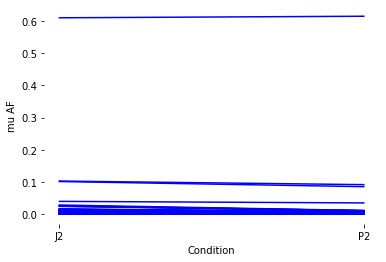

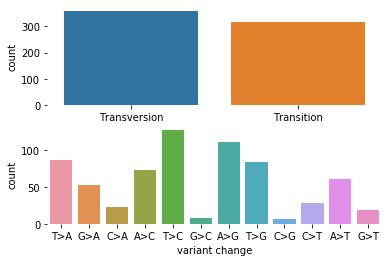

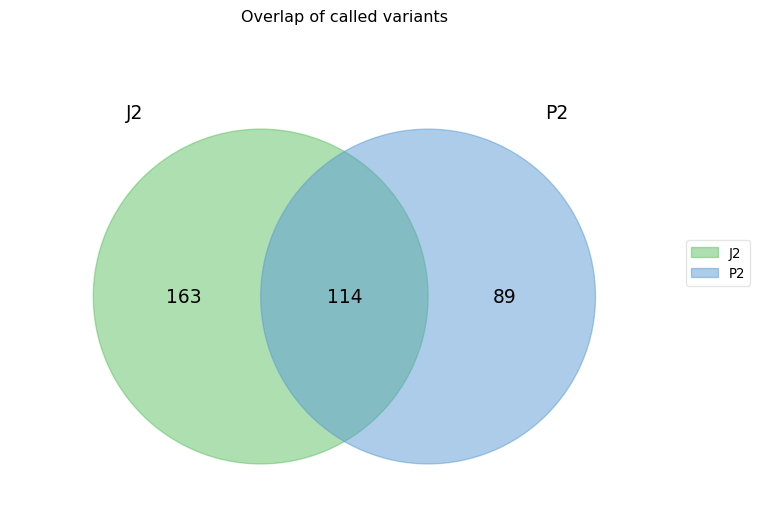

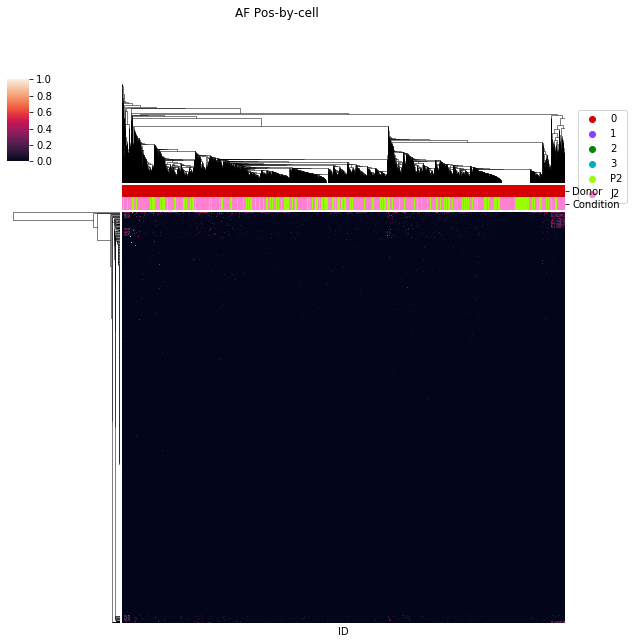

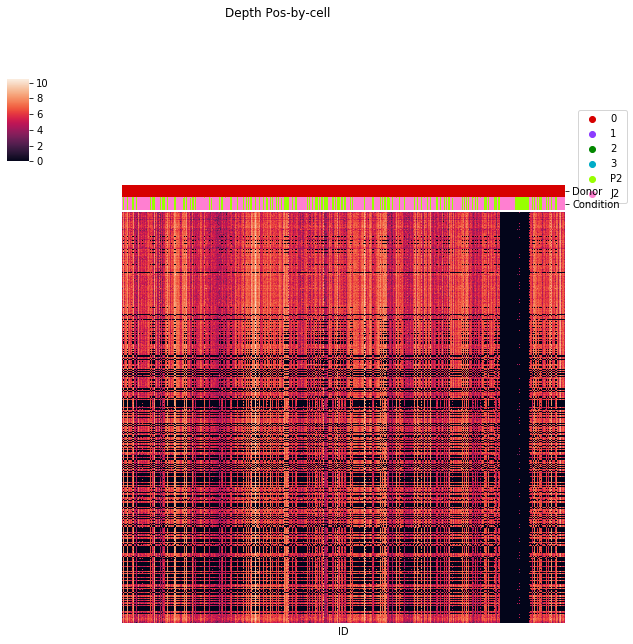

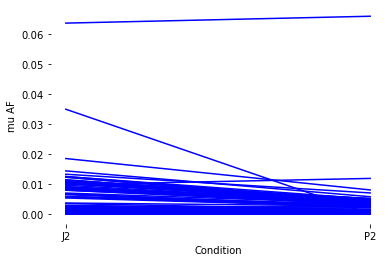

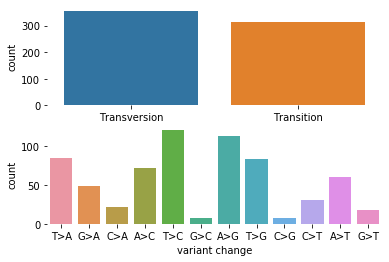

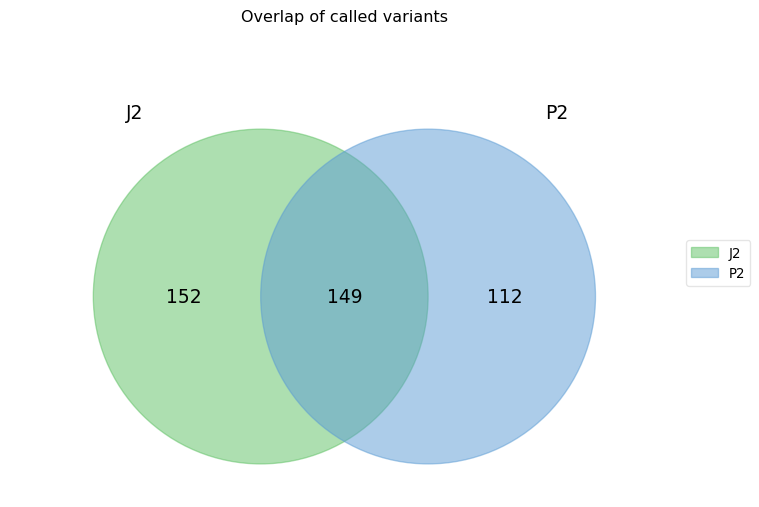

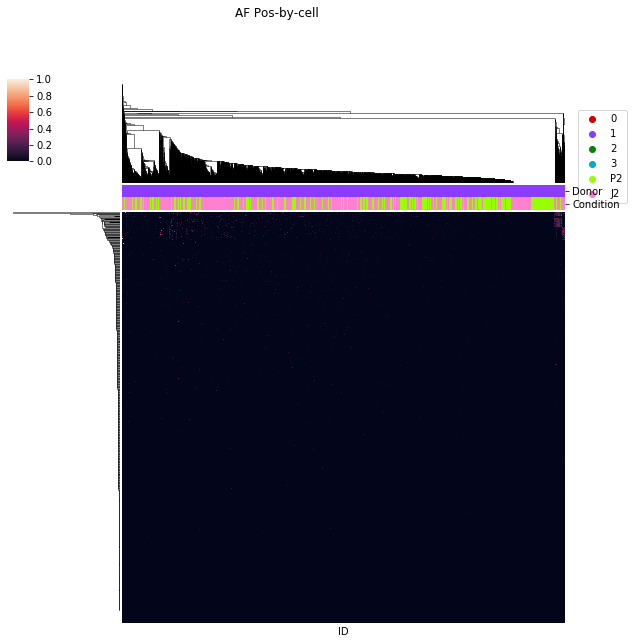

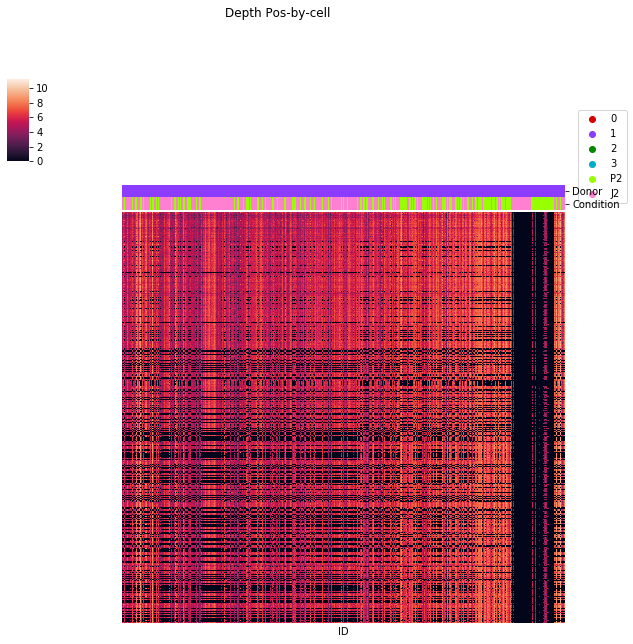

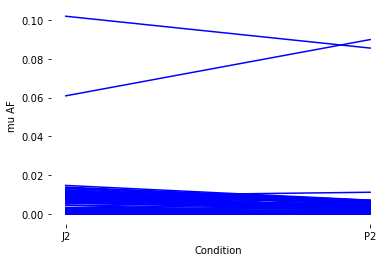

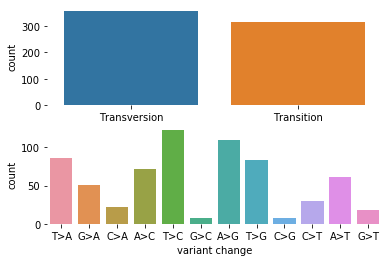

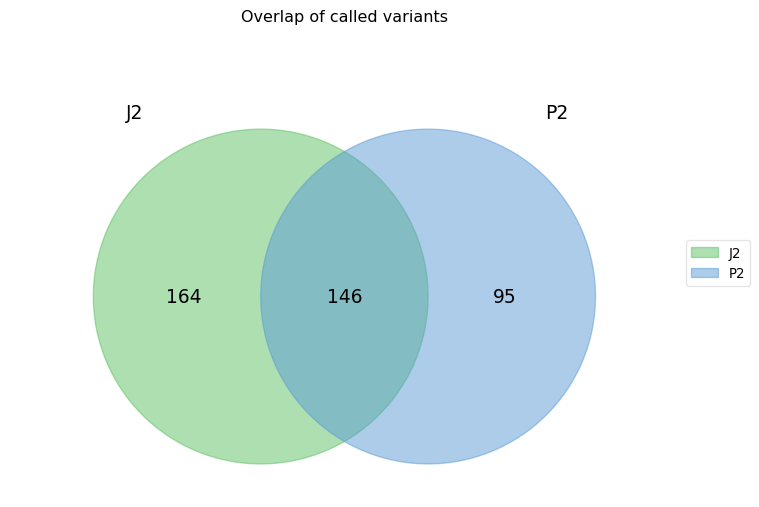

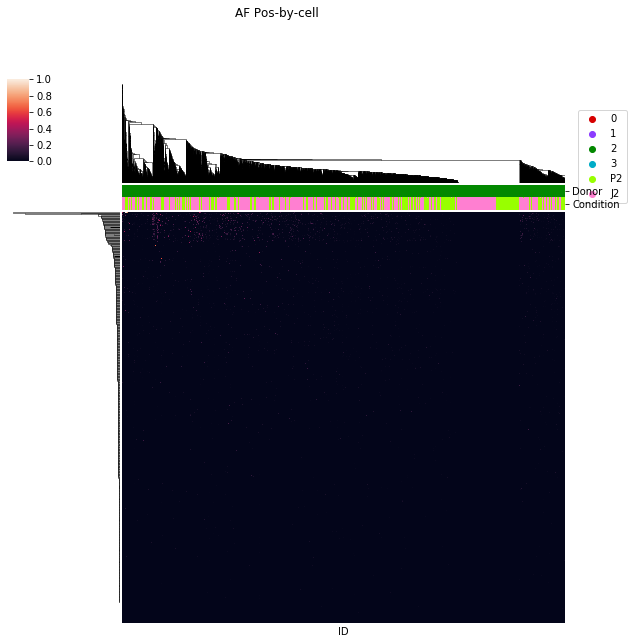

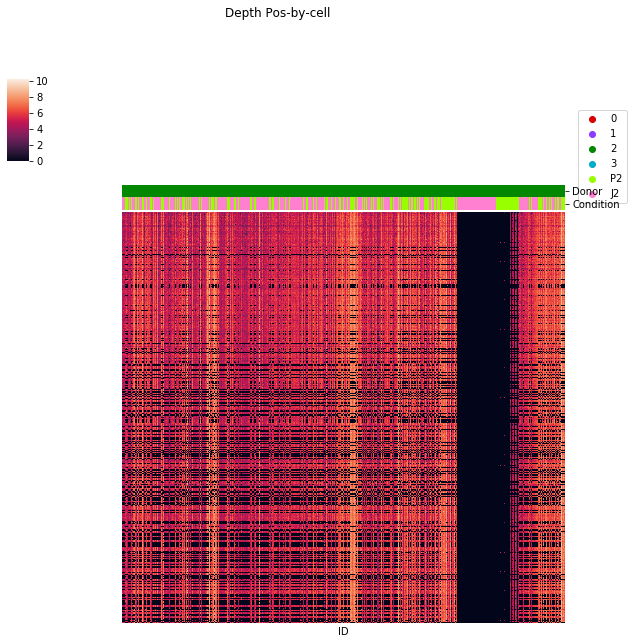

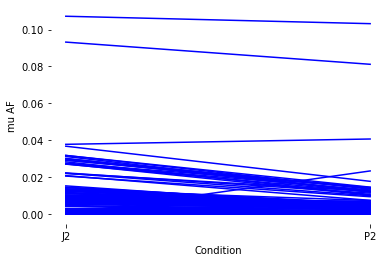

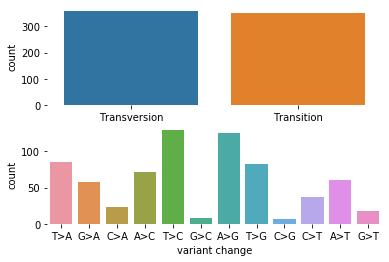

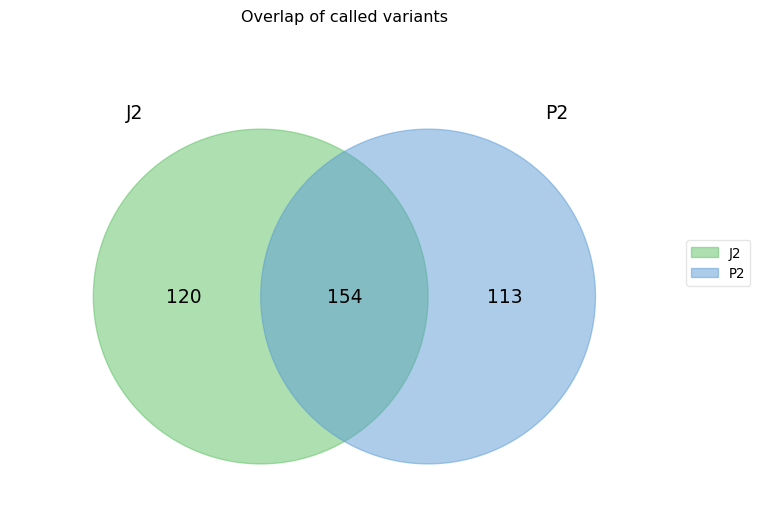

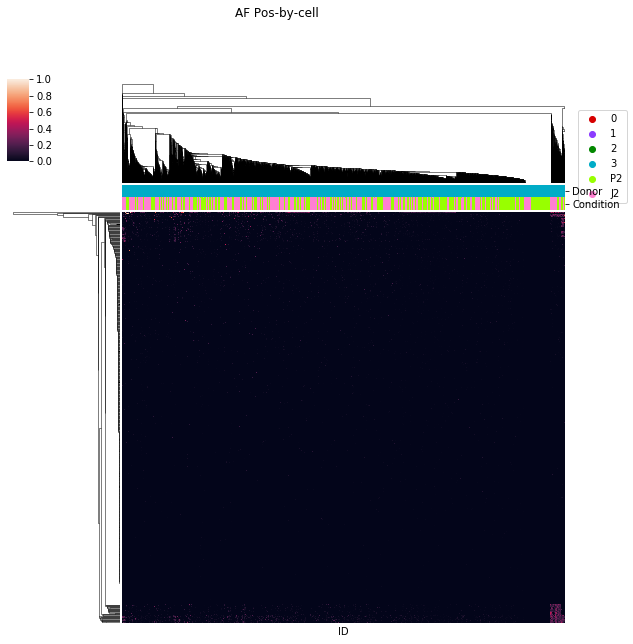

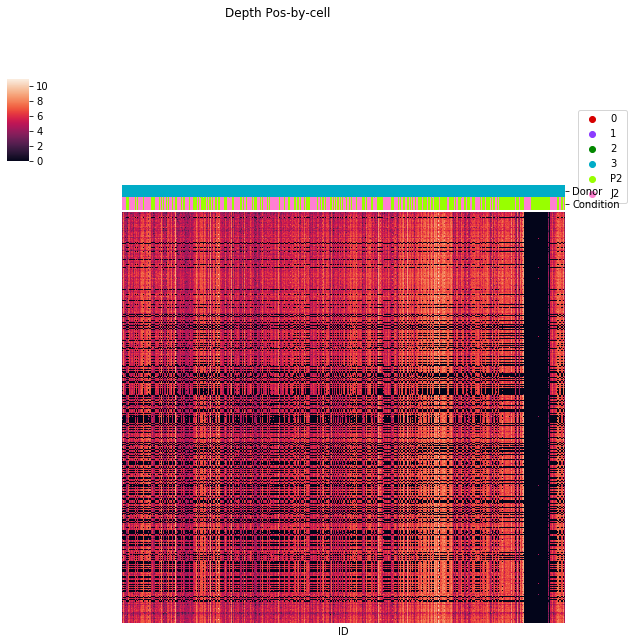

In [17]:
# #def run_mgatk_vireoDonors(samples, in_af, in_cov, in_mgatk, donors_dir, N_DONORS, out_dir):

in_af_d, in_mgatk_d, in_cov_d = prep_files([in_af, in_mgatk, in_cov], samples)

####
## Files processing
####
# Read the full AF tsv and the mgatk filtered variants
af = read_af(in_af_d)
mgatk_af = read_af(in_mgatk_d)
cov = read_af(in_cov_d)

####
## Allele frequency processing
####
# Filter for mgatk_afs
mgatk_afs = {}
variant_d = {}
for s in af:
    mgatk_afs[s] = filter_variants(af[s], mgatk_af[s].index)
    variant_d[s] = mgatk_af[s].index.values

# Drop any cells with no counts, which shouldnt really happen
for s in mgatk_af:
    mgatk_af[s] = drop_zero(mgatk_af[s],axis=1)
    
# Merge the AFs and add the sample name to the cell ID suffix
merged_afs = combine_dfs(copy.deepcopy(mgatk_afs), use_key=False, fillna=0, update_col_names=True)

# Create variant meta df with Position, Ref, Alt
variant_df = get_variants_df(merged_afs, to_plot=True, out_f=join(out_dir, 'variantMeta'))

####
## Coverage processing
####
# Load Coverage and extract only the variant positions
merged_covs = combine_dfs(copy.deepcopy(cov), use_key=False, fillna=0, update_col_names=True, 
                        col_inds=merged_afs.columns)
bin_af = binarize(merged_afs, het_thresh=0.001)
merged_covs = np.log2(merged_covs+1)

# Load and Extract donors
donors_df = load_donors(donors_dir, N_DONORS)

###
# Plotting MT Maps of merged conditions
###    
plot_variant_types_cat(variant_df, merged_covs , out_f=join(out_dir, 'variantMetaCounts'))
plot_overlap_variants(df=None, samples=None, variant_dict=variant_d, out_f=join(out_dir, 'overlapVariants'),key="Condition")
plot_mitomaps(merged_afs, merged_covs, samples=donors_df, log_cov=None, out_f=join(out_dir, "MT_heatmap"), sample_cells_n=500)

####
## Multiplex Donor extraction
####
# Default parameters here
donors = separate_donors(merged_afs, donors_df, remove_variants=True, variant_thresh=0.4, donor_thresh=0.75)
# Run with varying parameters
_ = separate_donors(merged_afs, donors_df, remove_variants=True, variant_thresh=0.4, donor_thresh=0.5)
_ = separate_donors(merged_afs, donors_df, remove_variants=True, variant_thresh=0.1, donor_thresh=0.9)
_ = separate_donors(merged_afs, donors_df, remove_variants=True, variant_thresh=0.4, donor_thresh=0.9)


####
## Plotting Donors
####
# Plot MT maps, including AF, 

# Plot variant overlap and heteroplasmy shifts between conditions
for d in donors:
    curr_af = donors[d]
    curr_cov = merged_covs.loc[curr_af.index,curr_af.columns]
    curr_donors_df = donors_df.loc[curr_af.columns]
    curr_var_df = variant_df.loc[curr_af.index]
    plot_heteroplasmy_shifts(curr_af,curr_donors_df, samples_key="Condition",
                             out_f=join(out_dir, f'donor{d}_HetShift'))
    plot_variant_types(curr_var_df, out_f=join(out_dir, f'donor{d}_variantMetaCounts'))
    plot_overlap_variants(df=curr_af, samples=curr_donors_df, variant_dict=None, 
                          out_f=join(out_dir, f'donor{d}_overlapVariants'),key="Condition", 
                         variant_thresh=0.1)
    plot_mitomaps(curr_af.fillna(0), curr_cov.fillna(0), samples=donors_df,
                 out_f=join(out_dir, f'donor{d}_MT_heatmap'))




#    return merged_afs, merged_cov, donors, samples, variant_df

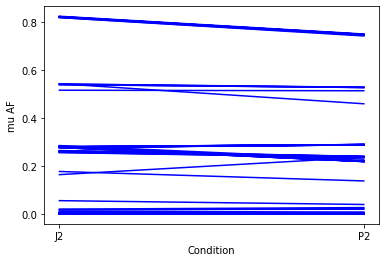

In [58]:
f, ax=plt.subplots()
count = 0
for ind, val in var_het.groupby("Var"):
    sns.lineplot(x="Condition", y="mu AF", data=val, ax=ax, ci=None, color='blue')
    count += 1


Clustering


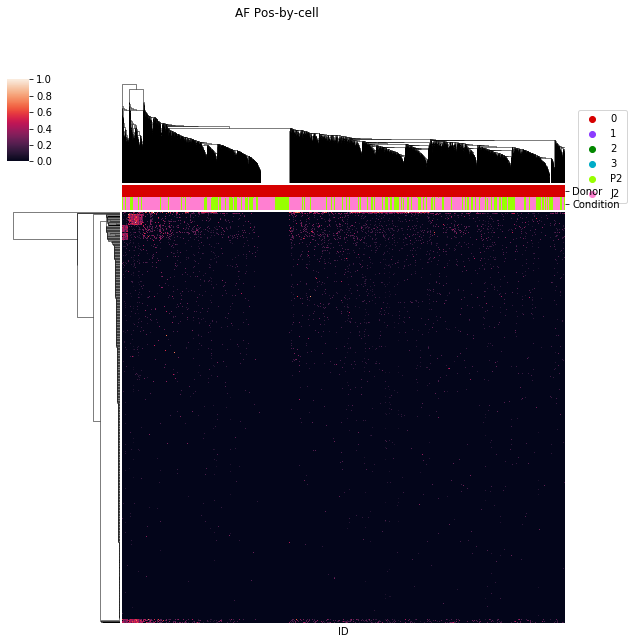

In [79]:
g = ch.plot_cluster(df=np.sqrt(curr_af.fillna(0)), fsave=None, to_z=False,
                    to_col_clust=True, col_meta=donors_df,
                    to_row_clust=True, name="AF Pos-by-cell",
                    col_names=False, row_names=False,
                    to_legend=True, method="average",
                    white_name=None, metric='euclidean',
                    to_save=False)

In [68]:
curr_cov

ID,AAACGAAAGCGATACG-1_P2,AAACGAAGTACCAAGG-1_P2,AAACTCGCACAAGGGT-1_P2,AAACTCGCACCTCGTT-1_P2,AAACTCGGTGCCCTAG-1_P2,AAACTCGGTGTAGGAC-1_P2,AAACTCGTCACTAGCA-1_P2,AAACTCGTCTATCCTA-1_P2,AAACTGCAGGTTTCTG-1_P2,AAACTGCAGTCCCGCA-1_P2,...,TTTGTGTAGGCACCTC-1_J2,TTTGTGTAGTATACCC-1_J2,TTTGTGTCAACTCGTA-1_J2,TTTGTGTCAAGGGTAC-1_J2,TTTGTGTCAGGGTAAC-1_J2,TTTGTGTCATTTCTTG-1_J2,TTTGTGTGTGAATACA-1_J2,TTTGTGTTCAAAGTAG-1_J2,TTTGTGTTCCTTTGCG-1_J2,TTTGTGTTCGTGGTAT-1_J2
88T>A,7.700440,6.459432,7.826548,7.459432,5.977280,NaN,8.174926,6.614710,7.467606,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103G>A,7.636625,6.569856,7.562242,7.219169,6.022368,NaN,7.960002,6.614710,7.303781,NaN,...,3.584963,5.392317,5.321928,4.392317,5.727920,6.375039,7.285402,6.339850,6.727920,4.584963
143G>A,6.857981,5.614710,7.033423,6.285402,5.807355,NaN,7.392317,6.022368,6.686501,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
146T>A,6.894818,5.643856,7.022368,6.303781,5.807355,NaN,7.339850,6.022368,6.629357,NaN,...,2.584963,4.459432,4.954196,4.087463,4.584963,5.584963,6.285402,5.321928,6.832890,3.459432
185G>A,7.044394,5.209453,6.569856,6.108524,6.149747,NaN,7.266787,5.459432,6.209453,NaN,...,3.459432,4.000000,4.906891,4.087463,4.169925,4.954196,5.781360,3.906891,6.357552,3.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263A>T,7.475733,6.894818,7.665336,7.055282,6.918863,NaN,7.531381,6.285402,7.839204,NaN,...,4.169925,5.321928,5.754888,5.459432,5.832890,6.228819,7.238405,5.882643,7.321928,5.727920
13269A>T,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,4.321928,5.392317,5.807355,5.392317,5.930737,6.554589,7.257388,5.882643,7.312883,5.700440
13305C>T,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,4.857981,5.643856,5.321928,4.954196,5.754888,6.643856,7.118941,5.357552,7.139551,5.392317
13827A>T,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,5.044394,4.954196,5.807355,5.044394,6.459432,6.554589,7.118941,5.832890,6.459432,5.392317


In [67]:
curr_af


ID,AAACGAAAGCGATACG-1_P2,AAACGAAGTACCAAGG-1_P2,AAACTCGCACAAGGGT-1_P2,AAACTCGCACCTCGTT-1_P2,AAACTCGGTGCCCTAG-1_P2,AAACTCGGTGTAGGAC-1_P2,AAACTCGTCACTAGCA-1_P2,AAACTCGTCTATCCTA-1_P2,AAACTGCAGGTTTCTG-1_P2,AAACTGCAGTCCCGCA-1_P2,...,TTTGTGTAGGCACCTC-1_J2,TTTGTGTAGTATACCC-1_J2,TTTGTGTCAACTCGTA-1_J2,TTTGTGTCAAGGGTAC-1_J2,TTTGTGTCAGGGTAAC-1_J2,TTTGTGTCATTTCTTG-1_J2,TTTGTGTGTGAATACA-1_J2,TTTGTGTTCAAAGTAG-1_J2,TTTGTGTTCCTTTGCG-1_J2,TTTGTGTTCGTGGTAT-1_J2
88T>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
103G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
143G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
146T>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
185G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.133333,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
13269A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.021505,0.0,0.0,0.000000,0.0
13305C>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.028571,0.0
13827A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [63]:
merged_covs.loc[:,curr_af.columns]

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ID,AAACGAAAGCGATACG-1_P2,AAACGAAGTACCAAGG-1_P2,AAACTCGCACAAGGGT-1_P2,AAACTCGCACCTCGTT-1_P2,AAACTCGGTGCCCTAG-1_P2,AAACTCGGTGTAGGAC-1_P2,AAACTCGTCACTAGCA-1_P2,AAACTCGTCTATCCTA-1_P2,AAACTGCAGGTTTCTG-1_P2,AAACTGCAGTCCCGCA-1_P2,...,TTTGTGTAGGCACCTC-1_J2,TTTGTGTAGTATACCC-1_J2,TTTGTGTCAACTCGTA-1_J2,TTTGTGTCAAGGGTAC-1_J2,TTTGTGTCAGGGTAAC-1_J2,TTTGTGTCATTTCTTG-1_J2,TTTGTGTGTGAATACA-1_J2,TTTGTGTTCAAAGTAG-1_J2,TTTGTGTTCCTTTGCG-1_J2,TTTGTGTTCGTGGTAT-1_J2
1G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3T>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6C>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16565C>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16566G>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16567A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
curr_af

ID,AAACGAAAGCGATACG-1_P2,AAACGAAGTACCAAGG-1_P2,AAACTCGCACAAGGGT-1_P2,AAACTCGCACCTCGTT-1_P2,AAACTCGGTGCCCTAG-1_P2,AAACTCGGTGTAGGAC-1_P2,AAACTCGTCACTAGCA-1_P2,AAACTCGTCTATCCTA-1_P2,AAACTGCAGGTTTCTG-1_P2,AAACTGCAGTCCCGCA-1_P2,...,TTTGTGTAGGCACCTC-1_J2,TTTGTGTAGTATACCC-1_J2,TTTGTGTCAACTCGTA-1_J2,TTTGTGTCAAGGGTAC-1_J2,TTTGTGTCAGGGTAAC-1_J2,TTTGTGTCATTTCTTG-1_J2,TTTGTGTGTGAATACA-1_J2,TTTGTGTTCAAAGTAG-1_J2,TTTGTGTTCCTTTGCG-1_J2,TTTGTGTTCGTGGTAT-1_J2
88T>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
103G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
143G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
146T>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
185G>A,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.133333,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
13269A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.021505,0.0,0.0,0.000000,0.0
13305C>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.028571,0.0
13827A>T,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
variant_

In [33]:
var_het = plot_heteroplasmy_shifts(merged_afs, donors_df, samples_key="Condition",
                             out_f=None)

var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000296
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000145
185G>A          J2    185G>A  0.255452
...            ...       ...       ...
13263A>T        J2  13263A>T  0.000080
13269A>T        J2  13269A>T  0.000250
13305C>T        J2  13305C>T  0.000582
13827A>T        J2  13827A>T  0.000249
15244A>T        J2  15244A>T  0.000119

[710 rows x 3 columns]
var_het
         Condition       Var     mu AF
88T>A           J2     88T>A  0.000000
103G>A          J2    103G>A  0.000296
143G>A          J2    143G>A  0.000000
146T>A          J2    146T>A  0.000145
185G>A          J2    185G>A  0.255452
...            ...       ...       ...
13263A>T        P2  13263A>T  0.000000
13269A>T        P2  13269A>T  0.000000
13305C>T        P2  13305C>T  0.000000
13827A>T        P2  13827A>T  0.000000
15244A>T        P2  15244A>T  0.000000

[1420 rows x 3 columns]

/data2/mito_lineage/src/clones.py:200: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  print('var_het')


In [59]:
val

,Condition,Var,mu AF
983C>T,J2,983C>T,0.000829
983C>T,P2,983C>T,0.000000


In [31]:
g = ch.plot_cluster(df=merged_afs, fsave=out_dir + "MT.af.png", to_z=False,
                        to_col_clust=True, col_meta=donors_df,
                        to_row_clust=True, name="AF Pos-by-cell",
                        col_names=False, row_names=False,
                        to_legend=True, method="average",
                        white_name=None, metric='euclidean',
                        to_save=True)

here
Clustering


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd008632268> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd008642a60> (for post_execute):


KeyboardInterrupt: 

In [24]:
g = ch.plot_cluster(df=af, fsave=out_f + ".af.png", to_z=False,
                    to_col_clust=True, col_meta=samples,
                    to_row_clust=True, name="AF Pos-by-cell",
                    col_names=False, row_names=False,
                    to_legend=True, method="average",
                    white_name=None, metric='euclidean',
                    to_save=to_save)

NameError: name 'out_f' is not defined

AttributeError: 'QuadMesh' object has no property 'to_save'

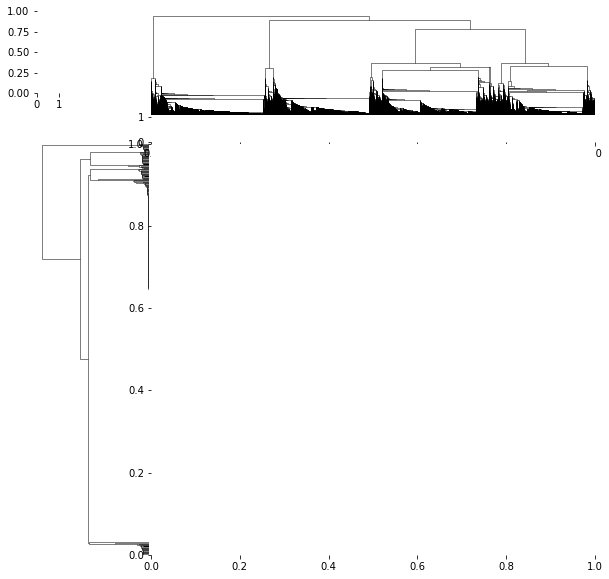

In [15]:
plot_mitomaps(merged_afs, merged_covs, 
              samples=donors_df, 
              log_cov=None, 
              out_f=join(out_dir, "MT_heatmap"), sample_cells_n=500)

In [101]:
plot_overlap_variants(df=None, samples=None, variant_dict=variant_d, out_f=join(out_dir, 'overlapVariants'),key="Condition")


using variant dict


TypeError: 'dict_values' object is not subscriptable

In [56]:
plot_mitomaps(merged_afs, merged_covs, samples=donors_df, log_cov=log2_cov, out_f=join(out_dir, "MT_heatmap"))

KeyError: "None of [Index(['88T>A', '103G>A', '143G>A', '146T>A', '185G>A', '250T>A', '318T>A',\n       '513G>A', '634T>A', '769G>A',\n       ...\n       '8926C>T', '8968A>T', '9590A>T', '11657G>T', '11719G>T', '13263A>T',\n       '13269A>T', '13305C>T', '13827A>T', '15244A>T'],\n      dtype='object', length=710)] are in the [index]"

<Figure size 720x720 with 0 Axes>

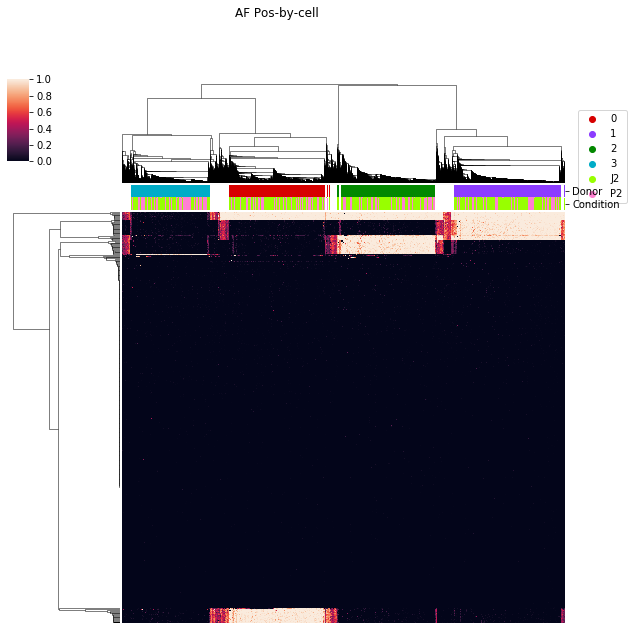

In [71]:
g = ch.plot_cluster(df=merged_afs.head(500), fsave=None, to_z=False,
                    to_col_clust=True, col_meta=donors_df,
                    to_row_clust=True, name="AF Pos-by-cell",
                    col_names=False, row_names=False,
                    to_legend=True, method="average",
                    white_name=None, metric='euclidean')

In [32]:
ch.plot_cluster(df=merged_covs.iloc[
    g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind],
                fsave=out_f + ".cov.png", to_z=False,
                to_col_clust=False, col_meta=samples,
                to_row_clust=False, name="Depth Pos-by-cell",
                col_names=False, row_names=False, to_legend=True,
                to_save=False)

NameError: name 'g' is not defined

In [81]:
cov = read_af(in_cov_d)

P2
J2


In [83]:
merged_covs = combine_dfs(copy.deepcopy(cov), use_key=False, fillna=0, update_col_names=True, 
                          col_inds=merged_afs.columns)
merged_covs

,AAACGAAAGAGGTCCA-1_P2,AAACGAAAGCGATACG-1_P2,AAACGAAAGTCGTGAG-1_P2,AAACGAACAATAGTGA-1_P2,AAACGAACACAATAAG-1_P2,AAACGAACACTGATAC-1_P2,AAACGAACAGTAACCT-1_P2,AAACGAACATCGTGAT-1_P2,AAACGAAGTAACGGTG-1_P2,AAACGAAGTAAGTCTC-1_P2,...,TTTGTGTGTGAATACA-1_J2,TTTGTGTGTTTGACCA-1_J2,TTTGTGTTCAAAGTAG-1_J2,TTTGTGTTCCTAGAGT-1_J2,TTTGTGTTCCTTTGCG-1_J2,TTTGTGTTCGAGTTAC-1_J2,TTTGTGTTCGCATAAC-1_J2,TTTGTGTTCGTGGTAT-1_J2,TTTGTGTTCGTTACAG-1_J2,TTTGTGTTCTCCTTGG-1_J2
1G>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3T>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4C>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6C>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8G>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564A>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16565C>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16566G>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16567A>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
cov['/data2/mito_lineage/data/processed/mttrace/jan21_2021/P2/MT/cellr_True/P2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/P2_lowC10.coverage.tsv']

,AAACGAAAGAGGTCCA-1,AAACGAAAGCGATACG-1,AAACGAAAGTCGTGAG-1,AAACGAACAATAGTGA-1,AAACGAACACAATAAG-1,AAACGAACACTGATAC-1,AAACGAACAGTAACCT-1,AAACGAACATCGTGAT-1,AAACGAAGTAACGGTG-1,AAACGAAGTAAGTCTC-1,...,TTTGTGTAGCCAGAAC-1,TTTGTGTCAGCAACCC-1,TTTGTGTCATGTATCG-1,TTTGTGTGTTTGCATG-1,TTTGTGTTCACTACCC-1,TTTGTGTTCCAAACCA-1,TTTGTGTTCCGATGCG-1,TTTGTGTTCCTAGAGT-1,TTTGTGTTCGCTCGGA-1,TTTGTGTTCTTCCACG-1
1G>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3T>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4C>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6C>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8G>A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16564A>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16565C>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16566G>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16567A>T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


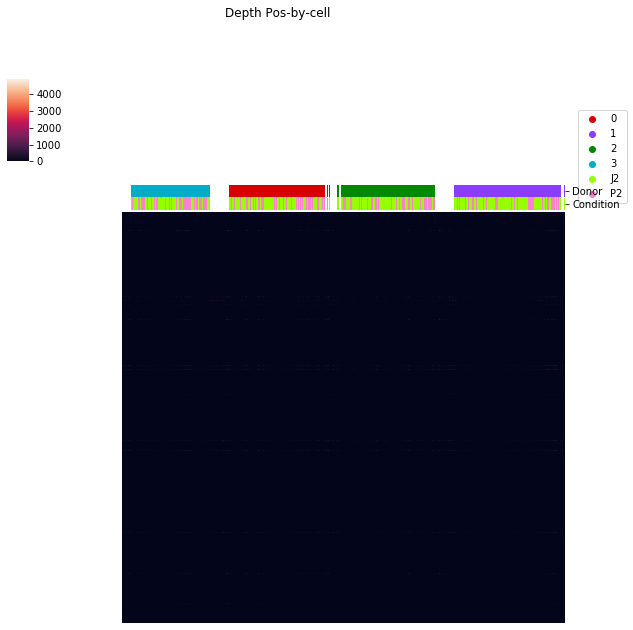

In [87]:
# Use same positions as the af
ch.plot_cluster(df=merged_covs.iloc[
    g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind],
                fsave=None, to_z=False,
                to_col_clust=False, col_meta=donors_df,
                to_row_clust=False, name="Depth Pos-by-cell",
                col_names=False, row_names=False, to_legend=True)

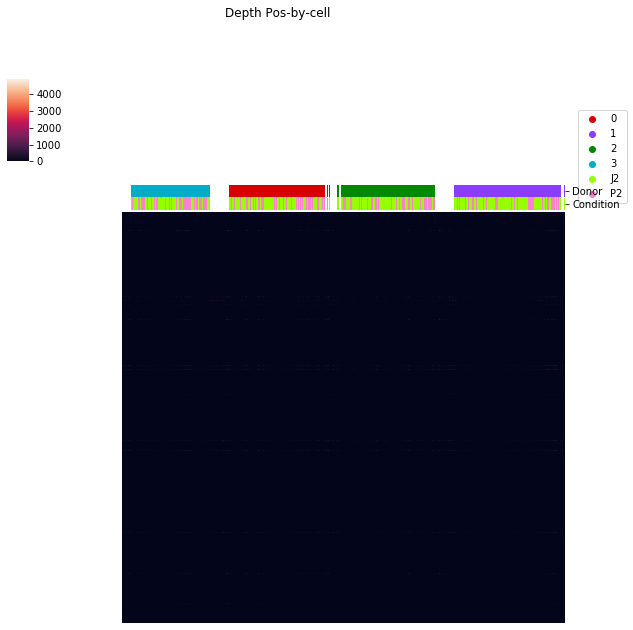

In [87]:
# Use same positions as the af
ch.plot_cluster(df=lo.iloc[
    g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind],
                fsave=None, to_z=False,
                to_col_clust=False, col_meta=donors_df,
                to_row_clust=False, name="Depth Pos-by-cell",
                col_names=False, row_names=False, to_legend=True)

In [ ]:
def plot_mitomaps(af, cov, samples, out_f="", bin_af=None,
                  log_cov=None):
    to_save = True
    if out_f == "":
        to_save = False

    g = ch.plot_cluster(df=af, fsave=out_f + ".af.png", to_z=False,
                        to_col_clust=True, row_meta=samples,
                        to_row_clust=True, name="AF Pos-by-cell",
                        col_names=False, row_names=False,
                        to_legend=True, method="average",
                        white_name=None, metric='euclidean',
                        to_save=to_save)


In [114]:
def d_from_lst(keys, vals):
    d ={val:vals[ind] for ind, val in enumerate(keys)}
    return

def prep_files(f_lists, samples):
    return [d_from_lst(x) for x in f_lists]

In [ ]:
def load_donors(donors_dir, N_DONORS, out_f=None):
    pair = dict()
    for d in range(N_DONORS):
        # add to the pair dictionary the {donor: file}
        pairs[d] = join(donors_dir,
                         f"cell_labels.donor{d}.txt")

    donors_df = load_lineage(pair, lin_col="Donor")
    donors_df["Condition"] = donors_df["ID"].apply(lambda x: x.split("_")[-1])
    donors_df = donors_df.set_index("ID")
    sns.countplot(data=donors_df, x="Donor", hue="Condition")
    hs(out_f)
    return donors_df

In [118]:
def plot_mitomaps(af, cov, samples, out_f="", bin_af=None, log_cov=None):
    to_save=True
    if out_f == "":
        to_save=False
        
    g = ch.plot_cluster(df=af,
                 fsave=out_f+".af.png", to_z=False, 
                to_col_clust=True, row_meta=samples, to_row_clust=True, name="AF Pos-by-cell", col_names=False,
                 row_names=False, to_legend=True, method="average", white_name=None, metric='euclidean',
                       to_save=to_save)
    
    # Use same positions as the af
    ch.plot_cluster(df=cov.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind],
                        fsave=out_f+".cov.png", to_z=False, 
                        to_col_clust=False, row_meta=samples, 
                        to_row_clust=False, name="Depth Pos-by-cell", 
                        col_names=False, row_names=False, to_legend=True, to_save=to_save)
    
    if bin_af is not None:
        # Use same positions as the af
        ch.plot_cluster(figsize=(7,4), dpi=300, 
                        df=bin_af.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind],
                        fsave=out_f+".afBinary.png", to_z=False, 
                        to_col_clust=False, row_meta=samples, to_row_clust=False, name="Depth Pos-by-cell", col_names=False,
                        row_names=False, to_legend=True, method="average", white_name=None,to_save=to_save)
        
    if log_cov is not None:
        # Use same positions as the af
        ch.plot_cluster(figsize=(7,4), dpi=300, 
                        df=log_cov.iloc[g.dendrogram_row.reordered_ind,g.dendrogram_col.reordered_ind],
                        fsave=out_f+".covLog2.png", to_z=False, 
                        to_col_clust=False, row_meta=samples, to_row_clust=False, name="Depth Pos-by-cell", col_names=False,
                        row_names=False, to_legend=True, method="average", white_name=None, metric='euclidean')

    #sns.distplot(np.log10(cov.sum(axis=0)+1))
    sns.displot(data=pd.merge(np.log10(cov.sum(axis=0)+1), samples, how='inner'), 
                x=0, hue="Condition", kind="kde")

    return g

In [ ]:
sns.distplot(np.log10(J2_depth.sum(axis=0)+1))
plt.title("J2 log10 cell total coverage over all variants called")

In [10]:
in_af_d ={val:in_af[ind] for ind, val in enumerate(samples)}
in_mgatk_d ={val:in_mgatk[ind] for ind, val in enumerate(samples)}
in_cov_d ={val:in_cov[ind] for ind, val in enumerate(samples)}

## Relate this to coverage

In [25]:
J2_depth = pd.read_csv(join(filter_mgatk_variants_J2,"J2_lowC10.coverage.tsv"), index_col=0, sep='\t')
J2_depth.columns = np.arange(1, J2_depth.shape[1]+1)
P2_depth = pd.read_csv(join(filter_mgatk_variants_P2,"P2_lowC10.coverage.tsv"), index_col=0,sep='\t')
P2_depth.columns = np.arange(1, P2_depth.shape[1]+1)
J2_depth.index = J2_depth.index + "_J2"
P2_depth.index = P2_depth.index + "_P2"

Text(0.5, 1.0, 'P2 log10 cell total coverage over all variants called')

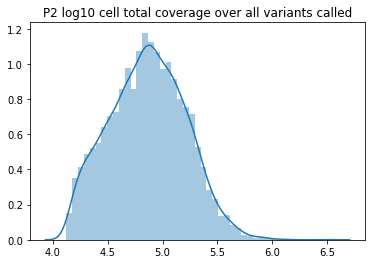

In [44]:
sns.distplot(np.log10(P2_depth.sum(axis=0)+1))
plt.title("P2 log10 cell total coverage over all variants called")

Text(0.5, 1.0, 'J2 log10 cell total coverage over all variants called')

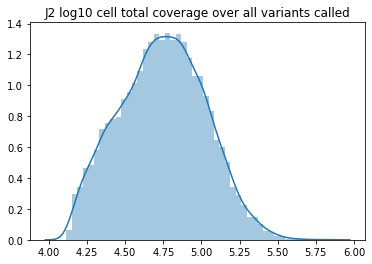

In [46]:
sns.distplot(np.log10(J2_depth.sum(axis=0)+1))
plt.title("J2 log10 cell total coverage over all variants called")